In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Шаг 1. Генерация данных
np.random.seed(0)            # Чтобы результаты были воспроизводимы
x = np.arange(100)           # 100 точек
noise = np.random.uniform(-20, 20, size=x.shape)  # Случайный шум
y = 5*x + 7 + noise          # Истинная линейная зависимость + шум

In [16]:
# Шаг 2. Функция потерь (MSE)
def mse_loss(w, b, x, y):
    return np.mean((y - (w*x + b))**2)

In [17]:
# Шаг 3. Вычисление градиентов
def compute_gradients(w, b, x, y):
    """
    Считает частные производные функции потерь (MSE) по w и b.
    dw = d/dw (MSE), db = d/db (MSE).
    """
    n = len(y)
    # Предсказание модели
    y_pred = w*x + b
    
    # Градиенты (с учётом среднего по выборке)
    dw = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    return dw, db

In [18]:
# Шаг 4. Функция градиентного спуска
def gradient_descent(x, y, learning_rate=1e-4, tol=1e-3, max_iter=100000):
    """
    Реализует градиентный спуск для линейной регрессии.
    
    Аргументы:
    - x, y: данные;
    - learning_rate: скорость обучения (lambda);
    - tol: порог сходимости (по модулю изменения параметров);
    - max_iter: максимальное число итераций.

    Возвращает:
    - w, b: оптимальные параметры модели.
    """
    # Начальные значения параметров
    w, b = 0.0, 0.0

    for i in range(max_iter):
        dw, db = compute_gradients(w, b, x, y)
        
        # Обновляем параметры
        w_new = w - learning_rate*dw
        b_new = b - learning_rate*db
        
        # Критерий остановки: если шаг очень маленький, завершаем
        if np.sqrt((w_new - w)**2 + (b_new - b)**2) < tol:
            print(f"Сошлись на {i}-й итерации.")
            w, b = w_new, b_new
            break
        
        w, b = w_new, b_new

    return w, b

In [19]:
# Шаг 5. Запуск градиентного спуска
w_gd, b_gd = gradient_descent(x, y)
mse_gd = mse_loss(w_gd, b_gd, x, y)

Сошлись на 8-й итерации.


In [20]:
# Шаг 6. Сравнение с np.polyfit

# np.polyfit вернёт (коэффициент наклона, свободный член)
w_lin, b_lin = np.polyfit(x, y, 1)
mse_lin = mse_loss(w_lin, b_lin, x, y)

In [21]:
# результаты
print("Градиентный спуск:")
print(f"  w = {w_gd:.4f}, b = {b_gd:.4f}, MSE = {mse_gd:.4f}")

print("np.polyfit:")
print(f"  w_lin = {w_lin:.4f}, b_lin = {b_lin:.4f}, MSE = {mse_lin:.4f}")


Градиентный спуск:
  w = 5.0619, b = 0.0813, MSE = 154.2591
np.polyfit:
  w_lin = 4.8989, b_lin = 10.9141, MSE = 124.4787


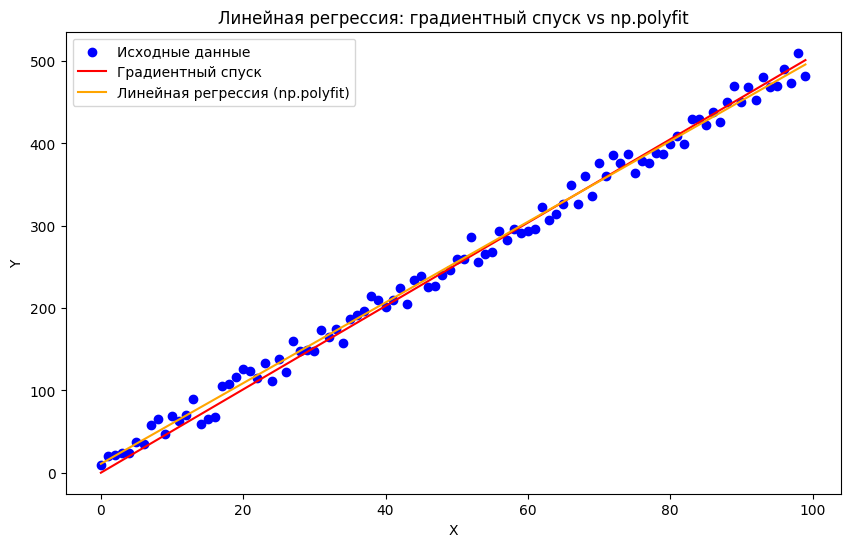

In [22]:
# Шаг 7. Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x, w_gd*x + b_gd, color="red", label="Градиентный спуск")
plt.plot(x, w_lin*x + b_lin, color="orange", label="Линейная регрессия (np.polyfit)")
plt.title("Линейная регрессия: градиентный спуск vs np.polyfit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()